
## Demonstrate and Communicate the Impact of Curse of Dimensionality on Model Performance in a Creative Manner

#### Kartik Mawa
#### Department of Petroleum and Geosystems Engineering - The University of Texas 

### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering





_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Lei Liu, Graduate Student, The University of Texas at Austin
##### [LinkedIn](https://www.linkedin.com/in/leiliu96/)

### Executive Summary

### THE CURSE AND THE FORTUNE


This project aims at an in-depth exploration of the intricate interplay between the **Curse of Dimensionality** and model accuracy within the realm of **K-nearest neighbors (KNN) regression**. Through a thoughtful combination of visualizations and insightful cross-validation, the curse of dimensionality is brought to life. These efforts showcase the delicate equilibrium required when navigating the terrain of dimensionality reduction. The code also includes an interactive platform to dynamically explore the consequential effects, empowering us to make well-informed decisions regarding the optimal parameters for their unique datasets.

By offering a nuanced understanding of the trade-offs involved, this code facilitates a more discerning approach to model selection and configuration. The final results table provides valuable insights into how dimensionality impacts both the efficiency and effectiveness of KNN regression models. This serves as a guide to optimize models in the face of increasing dimensions, fostering a deeper appreciation for the intricacies of the curse of dimensionality.

### Import Libraries

##### We need to import some libraries to perform data analysis, visualization, and machine learning tasks.


- **NumPy and Pandas:** These libraries are essential for data manipulation tasks. NumPy offers support for numerical computations with large, multi-dimensional arrays and matrices, while Pandas provides data structures for efficient handling of structured data, like tables and time series.

- **Scikit-learn:** This library is a go-to for machine learning tasks. We import specific functions for data preprocessing, model evaluation, and distance computation. For instance, we use `train_test_split` to split datasets, `StandardScaler` for feature standardization, `KNeighborsRegressor` for k-nearest neighbors regression, and more.

- **IPython Widgets:** The `ipywidgets` library is employed to enhance interactive capabilities within a Jupyter notebook. Widgets like `interact`, `IntSlider`, and `FloatSlider` facilitate user interface creation for dynamic exploration and analysis.

- **Time:** The `time` module is imported for tracking code execution time. It allows us to measure the time taken by specific code segments, which can be crucial for performance optimization and understanding the efficiency of our algorithms.

In [1]:
# Importing necessary libraries for data analysis and machine learning

import numpy as np                                          # for scientific computing 
import pandas as pd                                         # for data handling and manipulation
import matplotlib.pyplot as plt                             # for data visualization.
import seaborn as sns                                       # drawing attractive statistical graphics
import time                                                 # measuring the execution time of code
from sklearn.model_selection import train_test_split        # 'train_test_split' is used to split datasets for model evaluation
from sklearn.metrics import mean_squared_error              # find mse
from sklearn.preprocessing import StandardScaler            # for standardizing features 
from sklearn.neighbors import KNeighborsRegressor           # implementation of the KNN for regression
from sklearn.decomposition import PCA                       # for dimensionality reduction 
from sklearn.model_selection import cross_val_score         # performing cross-validation
from sklearn.model_selection import KFold                   # divides the dataset into k folds
from ipywidgets import interact, IntSlider, fixed, FloatSlider, Layout  # interactive widgets

### Functions

Let us import some functions that we will call later on in our workflow. This section helps in better understanding and visualizing the code.

Here is a rundown of the various functions we will need for our workflow:

1. #### `plot_corr(dataframe, size=10)`
   Plots a correlation matrix.

2. #### `apply_pca(X, n_components=None)`
   Apply Principal Component Analysis, a methodology to work in low dimensional space.

3. #### `knn_regression_with_evaluation(X_train, y_train, X_test, y_test, k=3, plot=True, n_components=None)`
   Performs KNN regression with evaluation.

4. #### `interactive_knn_regression(X_train, y_train, X_test, y_test, k=3, test_size=0.01, random_state=42, plot=True,                  n_components=1)`
   Interactive KNN regression.

5. #### `knn_regression_cross_validation(X, y, k, n_folds=5, n_components=None)`
   KNN regression with cross-validation.

6. #### `knn_regression_with_evaluation_timed(X_train, y_train, X_test, y_test, k=3, plot=True, n_components=None)`
   To calculate time for running model with each dimension.

7. #### `plot_computational_time_vs_dimensions(X_train, y_train, X_test, y_test, k=3, step=10, max_dimensions=50)`
   Plots the evaluated timing for each regression.

In [2]:
def plot_corr(dataframe, size=10):
    # Calculate the correlation matrix
    corr = dataframe.corr()
    
    # Create a figure and axis for the plot
    fig, ax = plt.subplots(figsize=(size, size))
    
    # Display the correlation matrix as an image with a colorbar
    im = ax.matshow(corr, vmin=-1.0, vmax=1.0)
    plt.colorbar(im, orientation='vertical')
    
    # Set the title of the plot
    plt.title('Correlation Matrix')

    
    
def apply_pca(X, n_components=None):
    # Standardize the features by removing the mean and scaling to unit variance
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Initialize PCA to None
    pca = None
    
    # If the number of components is specified, apply PCA
    if n_components is not None:
        pca = PCA(n_components=n_components)
        X_scaled = pca.fit_transform(X_scaled)

    # Return the standardized dataset, scaler, and PCA object
    return X_scaled, scaler, pca



def knn_regression_with_evaluation(X_train, y_train, X_test, y_test, k=3, plot=True, n_components=None):
    X_train_scaled, scaler_train, pca_train = apply_pca(X_train, n_components)
    X_test_scaled = scaler_train.transform(X_test)

    if pca_train is not None:
        X_test_scaled = pca_train.transform(X_test_scaled)

    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train_scaled, y_train)
    y_pred = knn_regressor.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')
    
    if plot:
        # Create subplots with 1 row and 2 columns
        fig, axes = plt.subplots(1, 2, figsize=(20, 8))

        # Plot for training set
        sns.set(style="whitegrid")

        # Scatter plot for training set
        y_pred_train = knn_regressor.predict(X_train_scaled)  # Predictions on the training set
        axes[0].scatter(y_train, y_pred_train, marker='x', color='orange', label='Training Set')

        # Add labels and title
        axes[0].set_xlabel("Actual Values")
        axes[0].set_ylabel("Predicted Values")
        axes[0].set_title("Actual vs. Predicted Values for Training Set")
        axes[0].legend()

        # Plot for test set
        sns.set(style="whitegrid")
        sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha': 0.5, 'marker': 'o', 'color': 'blue'},
                    line_kws={'color': 'black', 'linewidth': 2}, label='Test Set', ax=axes[1])

        # Add labels and title
        axes[1].set_xlabel("Actual Values")
        axes[1].set_ylabel("Predicted Values")
        axes[1].set_title("Actual vs. Predicted Values for Test Set")
        axes[1].legend()

        # Display the plots
        plt.show()

    return y_pred, mse

def interactive_knn_regression(X_train, y_train, X_test, y_test, k=3, test_size=0.01, random_state=42, plot=True, n_components=1):
    interact(
        knn_regression_with_evaluation,
        X_train=fixed(X_train), y_train=fixed(y_train),
        X_test=fixed(X_test), y_test=fixed(y_test),
        k=IntSlider(min=1, max=20, step=1, value=k, description='K'),
        n_components=IntSlider(min=1, max=X_train.shape[1], step=1, value=n_components, description='Components'),
        random_state=fixed(random_state),
        plot=fixed(plot),
        test_size=FloatSlider(min=0.01, max=0.5, step=0.01, value=test_size, description='Test Size')
    )



def knn_regression_cross_validation(X, y, k_range, n_folds=5, n_components=None, plot=True):
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    mse_values_per_k = []

    if n_components is not None:
        pca = PCA(n_components=n_components)
        X_transformed = pca.fit_transform(X)
    else:
        X_transformed = X

    # Reset index for y
    y_reset = y.reset_index(drop=True)

    for k in k_range:
        mse_values = []
        for fold, (train_index, test_index) in enumerate(kf.split(X_transformed), 1):
            # Reset indices before splitting
            if isinstance(X_transformed, pd.DataFrame):
                X_train, X_test = X_transformed.iloc[train_index], X_transformed.iloc[test_index]
            else:  # Assuming X_transformed is a NumPy array
                X_train, X_test = X_transformed[train_index], X_transformed[test_index]

            y_train, y_test = y_reset.iloc[train_index], y_reset.iloc[test_index]

            knn_regressor = KNeighborsRegressor(n_neighbors=k)
            knn_regressor.fit(X_train, y_train)
            y_pred = knn_regressor.predict(X_test)

            mse_values.append(mean_squared_error(y_test, y_pred))

        mse_values_per_k.append(np.mean(mse_values))
        
    if plot:
        # Plot K vs Mean Squared Error
        plt.figure(figsize=(10, 6))
        plt.plot(k_range, mse_values_per_k, marker='o', linestyle='-', color='r')
        plt.xlabel('Number of Neighbors (K)')
        plt.ylabel('Mean Squared Error')
        plt.title('Cross-Validation: Number of Neighbors vs Mean Squared Error')
        plt.grid(True)
        plt.show()
    
    best_k = k_range[np.argmin(mse_values_per_k)]
    print(f'Best k: {best_k}')

    return mse_values_per_k, best_k



def knn_regression_with_evaluation_timed(X_train, y_train, X_test, y_test, k=3, plot=True, n_components=None):
    start_time = time.time()  # Record the start time
    
    #Standardization and PCA
    X_train_scaled, scaler_train, pca_train = apply_pca(X_train, n_components)
    X_test_scaled = scaler_train.transform(X_test)

    if pca_train is not None:
        X_test_scaled = pca_train.transform(X_test_scaled)
    #KNN regression
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train_scaled, y_train)
    y_pred = knn_regressor.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')

    end_time = time.time()  # Record the end time
    elapsed_time = end_time - start_time
    print(f'Elapsed Time: {elapsed_time} seconds')

    if plot:
        # Create subplots with 1 row and 2 columns
        fig, axes = plt.subplots(1, 2, figsize=(20, 8))

        # Plot for training set
        sns.set(style="whitegrid")

        # Scatter plot for training set
        y_pred_train = knn_regressor.predict(X_train_scaled)  # Predictions on the training set
        axes[0].scatter(y_train, y_pred_train, marker='x', color='orange', label='Training Set')

        # Add labels and title
        axes[0].set_xlabel("Actual Values")
        axes[0].set_ylabel("Predicted Values")
        axes[0].set_title("Actual vs. Predicted Values for Training Set")
        axes[0].legend()

        # Plot for test set
        sns.set(style="whitegrid")
        sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha': 0.5, 'marker': 'o', 'color': 'blue'},
                    line_kws={'color': 'black', 'linewidth': 2}, label='Test Set', ax=axes[1])

        # Add labels and title
        axes[1].set_xlabel("Actual Values")
        axes[1].set_ylabel("Predicted Values")
        axes[1].set_title("Actual vs. Predicted Values for Test Set")
        axes[1].legend()

        # Display the plots
        plt.show()

    return y_pred, mse, elapsed_time


def plot_computational_time_and_mse_vs_dimensions(X_train, y_train, X_test, y_test, k=3, step=10, max_dimensions=50):
    dimensions = list(range(0, max_dimensions + 1, step))
    computational_times = []
    mse_values = []
    # Looping to find time taken over a range of dimensions
    for n_components in dimensions:
        if n_components > 0:
            _, mse, elapsed_time = knn_regression_with_evaluation_timed(X_train.iloc[:, :n_components].values, y_train.values,
                                                                         X_test.iloc[:, :n_components].values, y_test.values,
                                                                         k, plot=False, n_components=n_components)
            mse_values.append(mse)
            computational_times.append(elapsed_time)
        else:
            mse_values.append(0)  # Set MSE to 0 if n_components is 0
            computational_times.append(0)  # Set elapsed time to 0 if n_components is 0

    # Plot computational time vs number of dimensions
    plt.figure(figsize=(12, 8))
    plt.plot(dimensions, computational_times, marker='o', linestyle='--', color='r', label='Computational Time')
    plt.xlabel('Number of Dimensions')
    plt.ylabel('Computational Time (seconds)')
    plt.title('Computational Time and MSE vs Number of Dimensions')
    plt.grid(True)
    plt.legend(loc='upper left')
    plt.show()

    return None




### Load Data Into the Datset

This workflow leverages the dataset `players_20` from the widely acclaimed Football Manager 2021 video game series, formerly recognized as Worldwide Soccer Manager in North America between 2004 and 2008. Developed by the British developer Sports Interactive and published by Sega, Football Manager stands as a renowned series of football management simulation video games.

Notably, this dataset is readily accessible online and not only caters to the gaming community but also serves as a valuable tool for real-life football managers seeking insights and strategies. The dataset has been thoughtfully modified to include an array of random features, intentionally introducing an element of uncertainty into the data. 

In [3]:
url = 'https://raw.githubusercontent.com/Kakamawa/PGE383ML/main/players_20.csv'
data = pd.read_csv(url, index_col=0)
data.head(10)                                           

,age,height_cm,weight_kg,Net worth,wage_eur,International Reputation,weak_foot,skill_moves,Pace,Shooting,...,Finesse,behaviour,influence,power,affluence,final3rd,defensive 3rd,FA Score,BigGamePerformance,Overall
Name,,,,,,,,,,,,,,,,,,,,,
L. Messi,32,170,72,95500000,565000,5,4,4,87.0,92.0,...,0,78,40,75,16,100.003456,16.150723,9519,57,94
Cristiano Ronaldo,34,187,83,58500000,405000,5,4,5,90.0,93.0,...,-1,5,7,56,61,25.000016,12.000000,5709,68,93
Neymar Jr,27,175,68,105500000,290000,5,5,5,91.0,85.0,...,-1,7,25,93,2,59.287992,37.045540,9853,30,92
J. Oblak,26,188,87,77500000,125000,3,3,1,0.0,0.0,...,0,47,93,63,26,86.004185,14.981273,230,84,91
E. Hazard,28,175,74,90000000,470000,4,4,4,91.0,83.0,...,-1,84,26,44,58,55.002596,10.390231,955,62,91
K. De Bruyne,28,181,70,90000000,370000,4,5,4,76.0,86.0,...,1,19,17,94,61,84.326538,52.277470,7240,8,91
M. ter Stegen,27,187,85,67500000,250000,3,4,1,0.0,0.0,...,-1,35,53,24,10,60.015994,25.092718,6020,100,90
V. van Dijk,27,193,92,78000000,200000,3,3,2,77.0,60.0,...,1,12,88,25,12,80.000013,26.000000,1704,76,90
L. Modrić,33,172,66,45000000,340000,4,4,4,74.0,76.0,...,1,31,1,96,100,80.428544,54.261173,3222,11,90


One might be looking at the data and sense that there is something wrong, the data is a little erroneous.

For Example:  Cristiano Ronaldo with a influence of 7 and finesse of -1 doesn't make sense. As previously mentioned, a bunch of randomness was deliberately incorporated into the dataset.

#### Summary Statistics

We'll generate a summary statistic of our dataset to get an idea of the numerical aspect of our model. Various statistics like mean, standard deviation and the quartiles give us an idea of the range of data we will be working with. 

In [4]:
data.describe().transpose()                           #Generate Summary Statistics

,count,mean,std,min,25%,50%,75%,max
age,18276.0,2.528338e+01,4.657209e+00,16.000000,22.00000,25.000000,2.900000e+01,4.200000e+01
height_cm,18276.0,1.813610e+02,6.756227e+00,156.000000,177.00000,181.000000,1.860000e+02,2.050000e+02
weight_kg,18276.0,7.527517e+01,7.047166e+00,50.000000,70.00000,75.000000,8.000000e+01,1.100000e+02
Net worth,18276.0,2.484214e+06,5.585760e+06,0.000000,325000.00000,700000.000000,2.100000e+06,1.055000e+08
wage_eur,18276.0,9.457485e+03,2.135279e+04,0.000000,1000.00000,3000.000000,8.000000e+03,5.650000e+05
...,...,...,...,...,...,...,...,...
final3rd,18276.0,5.323585e+01,2.619248e+01,1.000000,30.00474,51.327800,7.602943e+01,1.002417e+02
defensive 3rd,18276.0,3.243571e+01,1.344714e+01,1.349504,22.37886,31.197803,4.372435e+01,5.628012e+01
FA Score,18276.0,5.154321e+03,2.978416e+03,0.000000,2571.75000,5144.000000,7.739000e+03,1.030500e+04
BigGamePerformance,18276.0,5.022253e+01,2.877308e+01,1.000000,25.00000,50.000000,7.500000e+01,1.000000e+02


There are **``100 different dimensions``** (predictor features) to work with in our model. The Players **``Overall``** is the 1 response feature. For this game, it is a metric that grades all the players we have on a scale from 0 to 100. Through our observation, we can see that the minimum is around 48 and the maximum is 94 on that metric.

The next step is to check for Nan values in the dataset. NaN (Not a Number) values in our dataset are missing traits. Our dataset does contain NaN values. One of the many reasons why it has NaN values is because Midfielders and Attackers in our dataset are not graded on their Goalkeeping ability and vice versa. Let us assign all our NaN values to zero for better utilization of our machine learning algorithm 

In [5]:
nan_values = data.isna().any().any()  #Remove NaN Values
if nan_values:
    data.fillna(0,inplace=True)
    print("There were NaN values in the DataFrame, which are now assigned to 0.")
else:
    print("No NaN values in the DataFrame.")

There were NaN values in the DataFrame, which are now assigned to 0.


We shall now split our dataset into the predictor and response features and remove the players names since their names don't serve our model.

In [6]:
if 'Name' in data.columns:
    data = data.drop('Name', axis=1)
X = data.drop('Overall', axis=1)
y = data['Overall']

## Welcome to the Curse !

#### THE FIRST HURDLE : Visualization of our dataset 

Our intuitions and experiences are all built on a 3D space, and it becomes a daunting task to visualize our dataset in the high feature space. Thus, our ability to interpret relationships between the variables diminishes as our dimensions increase.

We wound up plotting our features in a 2D space, which is not an ideal representation of the hyperspace. Below is a code for visualizing the first five dimensions.

**SideNote: The code runs for a long time if we add too many dimensions.**

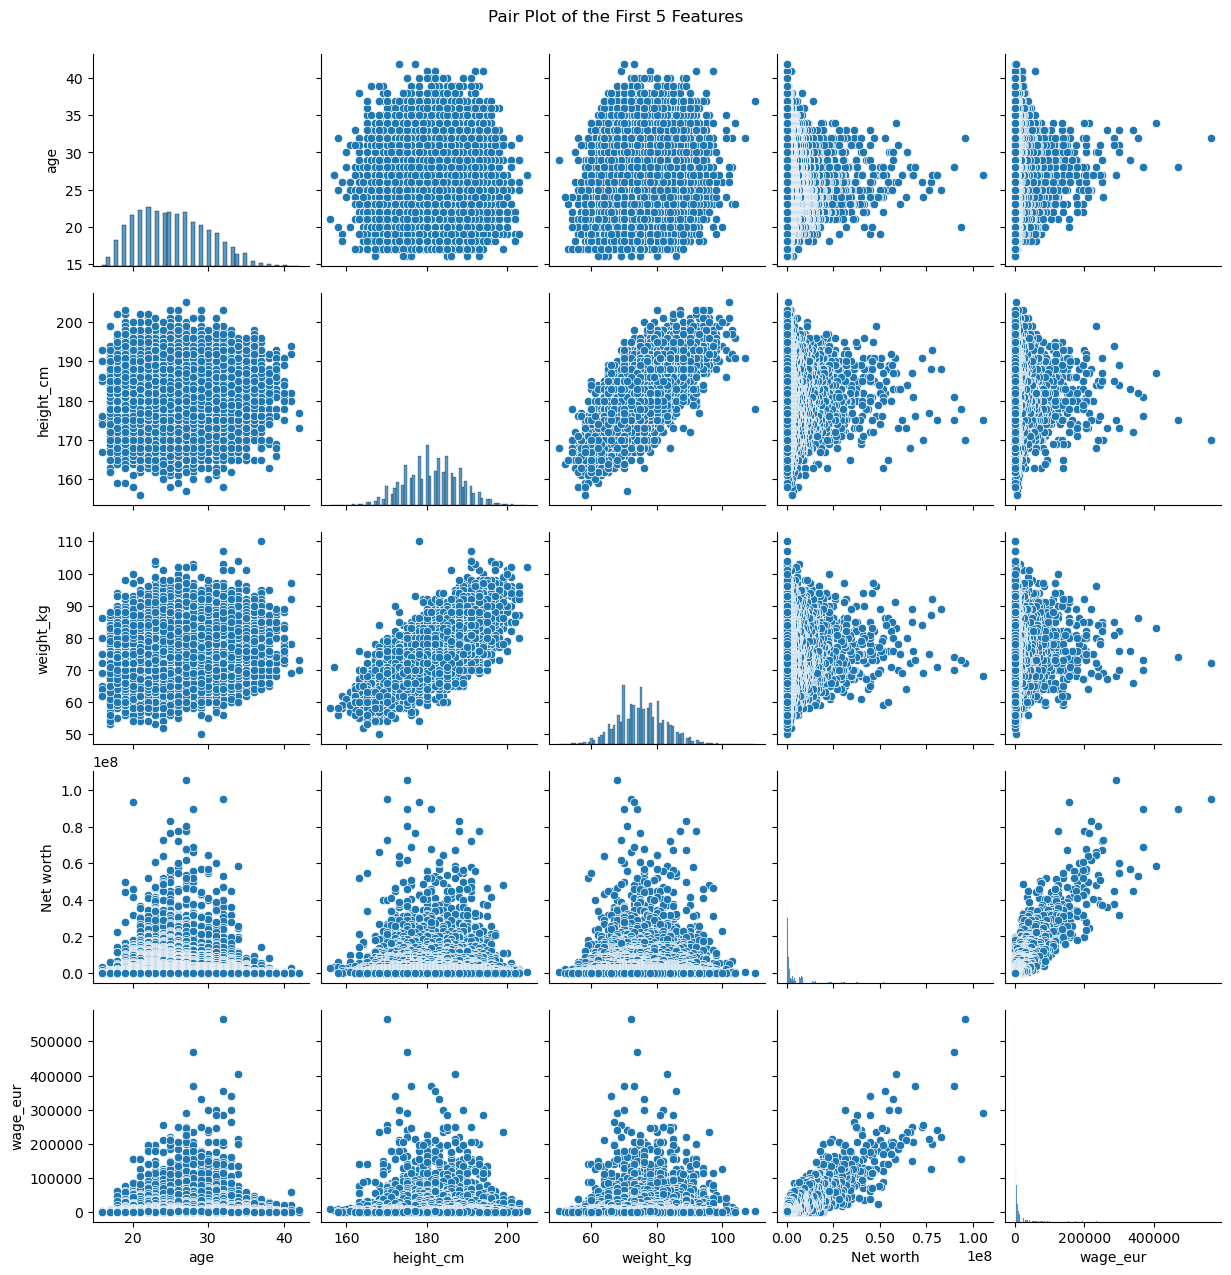

In [7]:
subset_of_features = data.iloc[:, :5]  # Select the first 5 features for example
sns.pairplot(subset_of_features)
plt.suptitle('Pair Plot of the First 5 Features', y=1.02)
plt.show()

A way to visually understand our data is to plot the **Correlation Matrix** by calculating the correlation coefficients. This shows us the strength of the linear relationships between the different pairs of the variables.

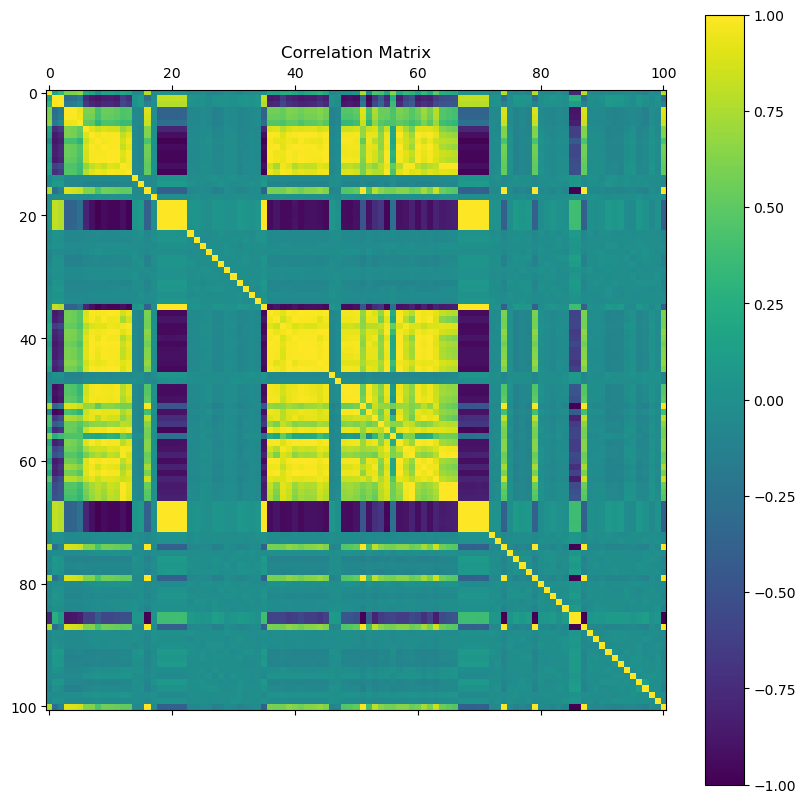

In [8]:
corr_matrix = np.corrcoef(data, rowvar=False)   #For plotting correlation matrix
corr_matrix_df = pd.DataFrame(corr_matrix, columns=data.columns, index=data.columns)
plot_corr(corr_matrix_df, size=10)
plt.show()

It is observed that there is a wide range of features, some of which are linearly related while others are not. It is definitely difficult to comprehend this correlation matrix. 


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42) #test-train split

X_train.columns = [f'feature_{i}' for i in range(X_train.shape[1])]
X_test.columns = [f'feature_{i}' for i in range(X_test.shape[1])]

#### THE SECOND HURDLE : Generating a KNN regression model for our dataset 


### KNN Regression

K-Nearest Neighbors (KNN) is a versatile and widely used algorithm in machine learning, applicable to both classification and regression tasks. In the context of regression, KNN is utilized for predicting continuous numeric values, as opposed to class labels.

### Basic Concept

#### Training Phase

- During the training phase, the algorithm memorizes the training dataset, which comprises input-output pairs (features and corresponding target values).

#### Prediction Phase

- To make a prediction for a new, unseen data point, KNN identifies the k-nearest neighbors of that point in the training dataset.
- The "nearest" neighbors are determined based on a distance metric, often Euclidean distance, but other metrics can be used.
- Distance is calculated in the feature space.

#### Prediction Calculation

- For regression, the predicted value for the new data point is typically the average (or weighted average) of the target values of its k-nearest neighbors.
- For example, if k=3, the predicted value is the average of the target values of its three nearest neighbors.

### Parameters

- **K (Number of Neighbors):** The choice of k is critical. A small k might lead to a noisy prediction, while a large k might smooth out important patterns.
- **Distance Metric:** The choice depends on the data and the problem.

### Advantages and Disadvantages

#### Advantages

- Simple and easy to understand.
- No need for an explicit training phase.
- Can adapt to complex decision boundaries.

#### Disadvantages

- Computationally expensive, especially with large datasets.
- Sensitive to irrelevant or redundant features.
- The choice of the distance metric and k can impact performance.

### Implementation Steps

1. Choose the value of k.
2. Select a distance metric.
3. Calculate the distance between the new data point and all points in the training set.
4. Identify the k-nearest neighbors.
5. Calculate the predicted value based on the average (or weighted average) of the target values of the k-nearest neighbors.

In summary, KNN regression is a non-parametric algorithm making predictions by considering the values of the nearest neighbors in the feature space. It's a flexible algorithm applicable to various regression problems, but its performance is influenced by parameter choices and data characteristics.





#### STEPS

We need to find k-parameter that best fits our regression. We rigorously test our model performance using K-fold cross validation over different sets of testing and training data.

1. Apply k-fold approach with iterative separation of training and testing data
2. Automate the model construction, looping over folds and averaging the metric of interest

**Note : THE FOLLOWING CODE TAKES TIME TO RUN**

We already have set our distance metric to Euclidean in the function. We may choose to change it to our desired metric as need be.

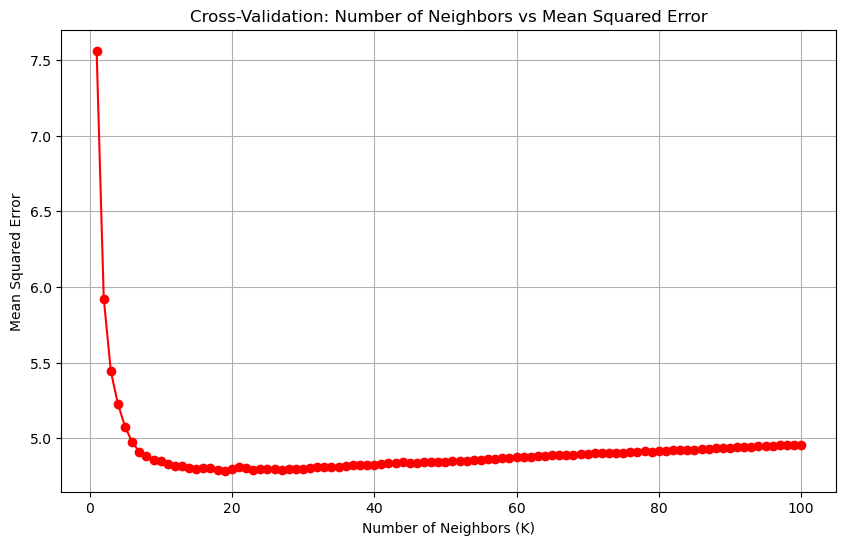

Best k: 19


In [10]:
k_range = range(1, 101)
#finds mse values for every k value and use the minimum one
mse_values_per_k = knn_regression_cross_validation(X_train, y_train, k_range, n_folds=5, n_components=None, plot=True)

It is clear that at 19 nearest neighbours, we get maximum accuracy in k-fold cross validation model testing. We will use this k-value for future predictions.

Below is a code of our predictions in the high dimensional space.

### K-Nearest Neighbours with our entire data

Mean Squared Error: 2.3002437067647565


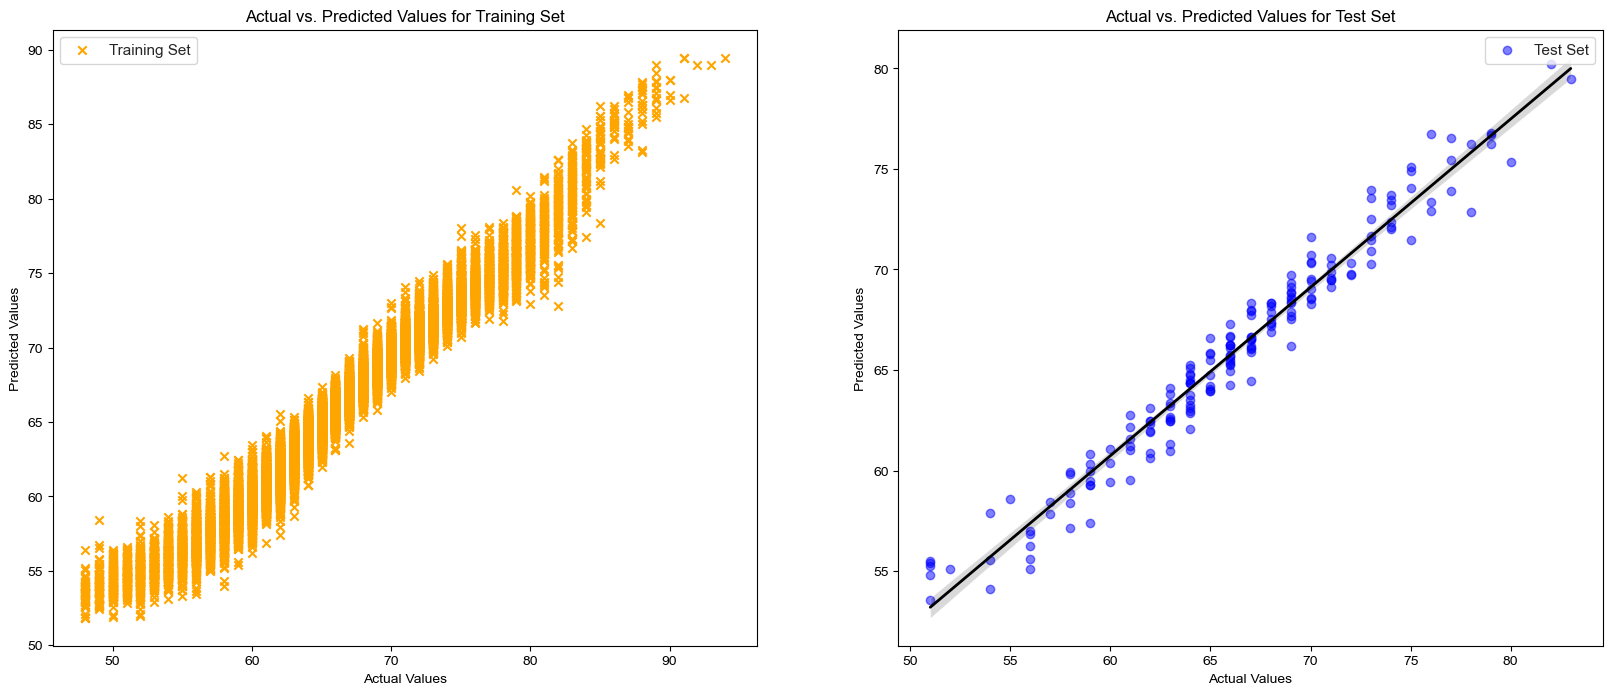

In [11]:
predictions_highd = knn_regression_with_evaluation(X_train, y_train, X_test, y_test, k=19, n_components=None)
#for n_components = None, it retains the entire dataset as it is

### THE FORTUNE

Let us convert our dataset to low dimension space and run the same regression model and compare between the two models.

We use Principal Component Analysis(PCA) method to lower our high dimensional dataset to a lower dimensional dataset. PCA is a dimensionality reduction technique widely used in machine learning and data analysis. Its primary goal is to transform high-dimensional data into a lower-dimensional space while retaining as much of the original variability as possible. PCA achieves this by identifying the principal components of the data, which are linear combinations of the original features.

Mean Squared Error: 0.7642704690976787


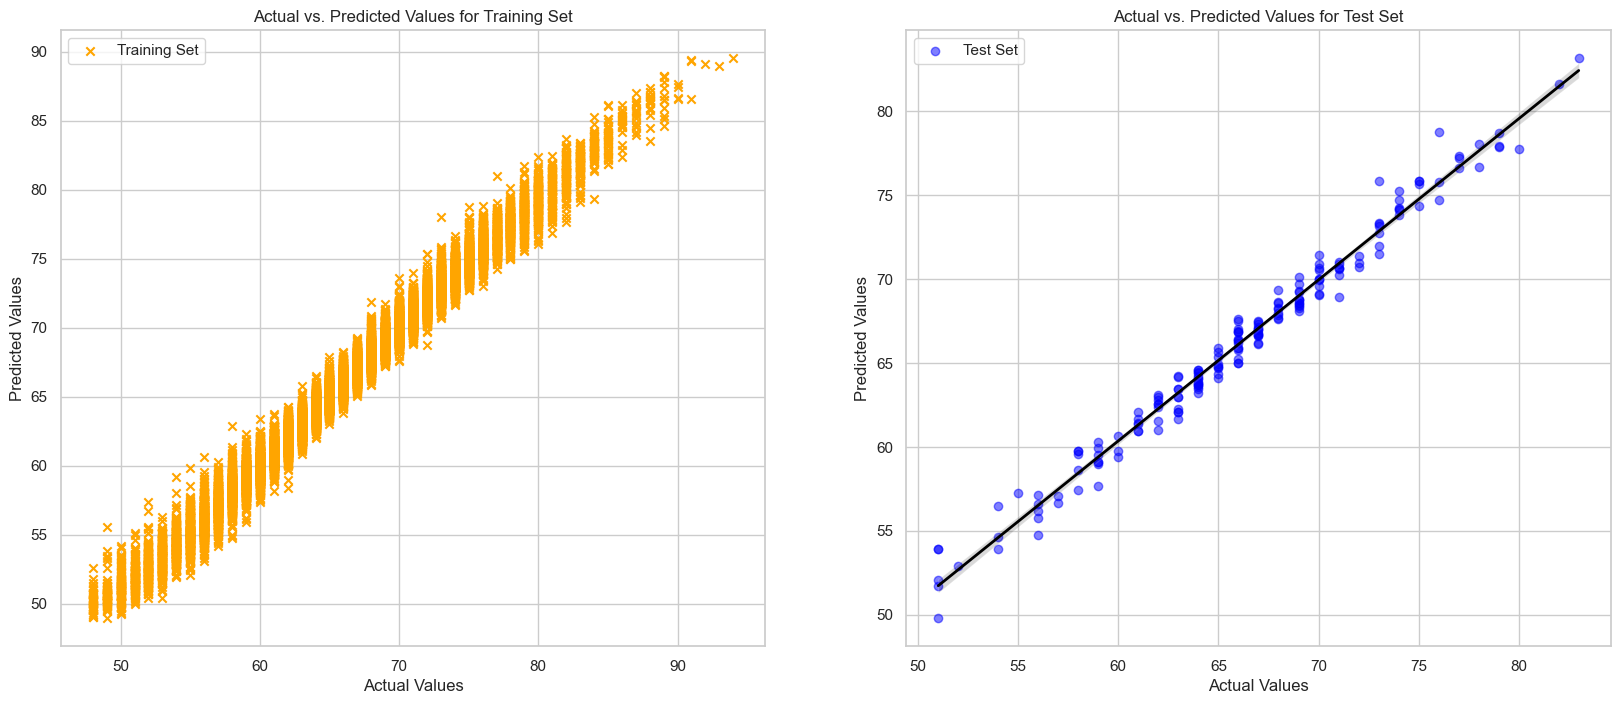

In [12]:
predictions_lowd = knn_regression_with_evaluation(X_train, y_train, X_test, y_test, k=19, n_components=4)
#Here, we use 4 principal components

Clearly, we can see a massive drop in the MSE values when we shift to a lower dimension. From a practical perspective, this is intensely beneficial. Not only this makes computation easy, but we ignore all the data features with low variance without losing much information.

### Interactive KNN

Below is an interactive where we can manually change our components (dimensions) and K-nearest neighbours. It's incredible to observe these changes live and we can immediately see our model performance variability.

In [13]:
interactive_knn_regression(X_train, y_train, X_test, y_test, k=1, test_size=0.01, random_state=42, plot=True, n_components=1)

interactive(children=(IntSlider(value=1, description='K', max=20, min=1), IntSlider(value=1, description='Comp…

### Computational Time

One prominent indicator of the computational burden imposed by high-dimensional datasets is the observed increase in computational time with a rise in the number of dimensions. This relationship becomes particularly pronounced when dealing with datasets featuring an abundance of dimensions. The exponential growth in computational time can render model training and evaluation computationally exhaustive.

We may observe how our computational time increases with dimensionality using the code below:

Mean Squared Error: 2.851278325235002
Elapsed Time: 0.1127619743347168 seconds
Mean Squared Error: 5.142485203517852
Elapsed Time: 0.12566637992858887 seconds
Mean Squared Error: 4.022069842423141
Elapsed Time: 0.14860272407531738 seconds
Mean Squared Error: 2.6019254348122254
Elapsed Time: 0.16655516624450684 seconds
Mean Squared Error: 2.3002437067647565
Elapsed Time: 0.19994354248046875 seconds


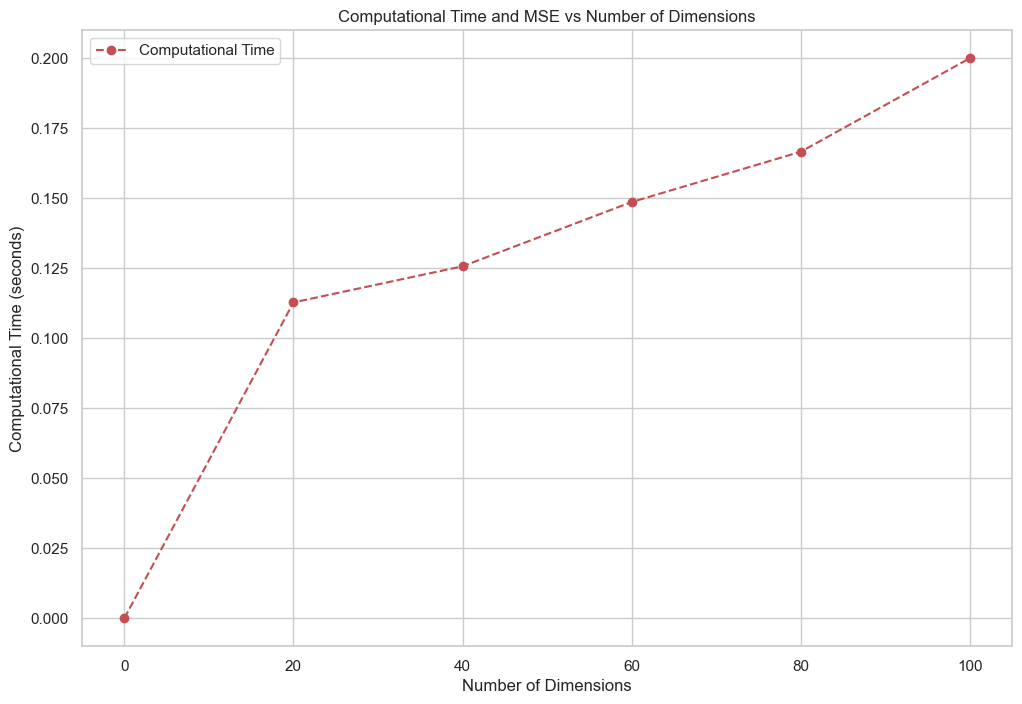

In [15]:
plot_computational_time_and_mse_vs_dimensions(X_train, y_train, X_test, y_test, k=19, step=20, max_dimensions=100)

The observed time increment may appear inconspicuous at first glance, yet its significance becomes pronounced when dealing with extremely high dimensions and models demanding exhaustive computations. Specifically, between 10 and 80 dimensions, the time required surged to more than threefold, signifying a substantial escalation.

### Result

Our models unequivocally demonstrate a noticeable enhancement in performance when operating within lower-dimensional spaces compared to higher-dimensional counterparts. The observed improvement suggests that reducing the dimensionality positively impacts the efficiency and predictive accuracy of our models.

| Number of Dimensions | Mean Squared Error | Computation Time (s) |
|----------------------|---------------------|-------------------------------|
| 0                    | 0                   | 0                             |
| 4                    | 0.777               | 0.022                          |
| 100                  | 2.268               | 0.199                       |
|             

    

### Conclusion

In the context of high-dimensional datasets, the observed exponential increase in computational time underscores the importance of adopting dimensionality reduction strategies. These approaches not only alleviate computational constraints but also have the potential to enhance the overall performance of machine learning models. By carefully selecting and implementing dimensionality reduction, practitioners can strike a balance between computational efficiency and model effectiveness in the face of complex and high-dimensional datasets.


I hope this was helpful,

*Kartik Mawa*

### About the Author

Hello! I am *Kartik Mawa*, a Graduate Student in Petroleum and Geosystems Engineering at The University of Texas at Austin.
In addition to this, now a data enthusiast and a machine learning practitioner.
This notebook serves as my submission for the Subsurface Machine Learning (PGE383) course project.

Feel free to connect with me on LinkedIn or mail me for further discussions or collaborations!

* **LinkedIn Profile:** [Kartik Mawa](https://www.linkedin.com/in/kartikmawa/)
* **Email ID:** kartikmawa@utexas.edu

___________________

#### Work Supervised by:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
